<a href="https://colab.research.google.com/github/bimarshak7/openCV-basics/blob/main/objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Template Matching

In [ ]:
!wget https://img.freepik.com/free-photo/pedigreed-puppy-collar-sitting-grass-park_651396-3781.jpg -q -O dog.jpg

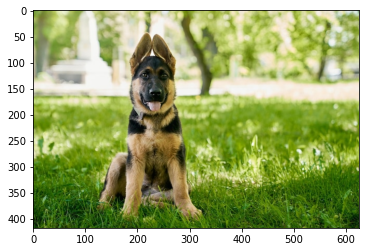

In [ ]:
full = cv2.imread("dog.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

plt.imshow(full)

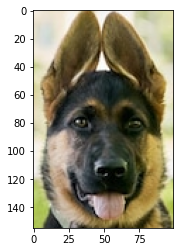

In [ ]:
face = full[45:200,180:280,:]
plt.imshow(face)

In [ ]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
height, width,channels = face.shape

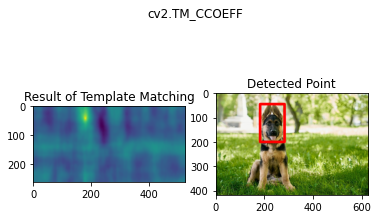

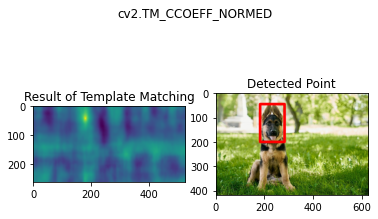

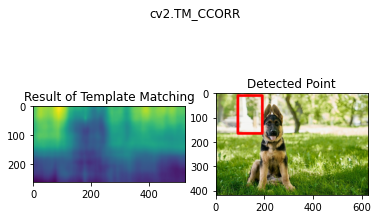

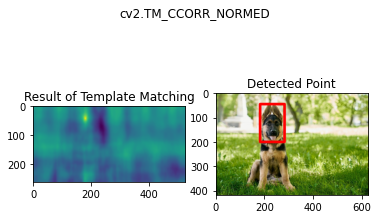

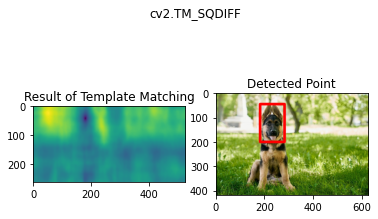

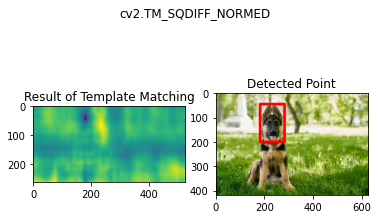

In [ ]:
for m in methods:
  full_copy = full.copy()
  method = eval(m)

  res = cv2.matchTemplate(full_copy,face,method)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
  else:
        top_left = max_loc

  bottom_right = (top_left[0] + width, top_left[1] + height)
  cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

  # Plot the Images
  plt.subplot(121)
  plt.imshow(res)
  plt.title('Result of Template Matching')
    
  plt.subplot(122)
  plt.imshow(full_copy)
  plt.title('Detected Point')
  plt.suptitle(m)
  plt.show()

## Corner Detection

In [ ]:
!wget https://m.media-amazon.com/images/I/51X7NE45NzL._SY355_.jpg -q -O chess.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/c/c3/Chess_board_opening_staunton.jpg -q -O real_chess.jpg

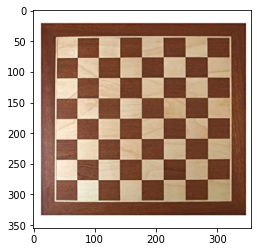

In [ ]:
chess = cv2.imread("chess.jpg")
chess = cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)

plt.imshow(chess)

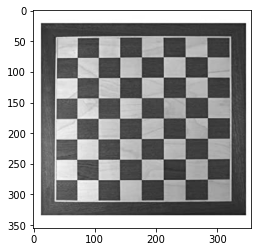

In [ ]:
chess_gray = cv2.cvtColor(chess,cv2.COLOR_RGB2GRAY)
# chess_gray = np.power(chess_gray,1.9)
plt.imshow(chess_gray,cmap="gray")

**Harris Corner Detection**

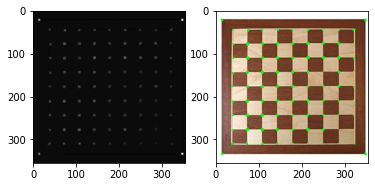

In [ ]:
chess_gray = np.float32(chess_gray)

dst = cv2.cornerHarris(src=chess_gray,blockSize=4,ksize=3,k=0.02)
dst = cv2.dilate(dst,None)

chess[dst>0.1*dst.max()]=[0,255,0]

plt.subplot(121)
plt.imshow(dst,cmap="gray")
plt.subplot(122)
plt.imshow(chess)

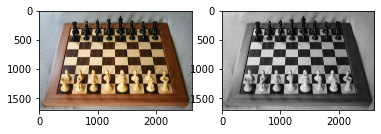

In [ ]:
real_chess = cv2.imread('real_chess.jpg')
real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(real_chess)

plt.subplot(122)
plt.imshow(gray_real_chess,cmap='gray')


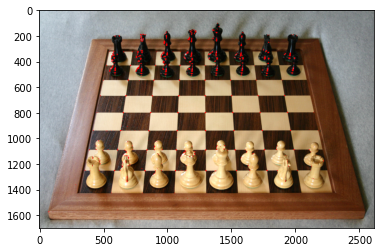

In [ ]:
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=5,ksize=5,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess,cmap="gray")

**Shi-TOmasi Algo**

In [ ]:
# reload all images
chess = cv2.imread('chess.jpg')
chess = cv2.cvtColor(chess,cv2.COLOR_BGR2RGB)
gray_chess = cv2.cvtColor(chess,cv2.COLOR_BGR2GRAY)

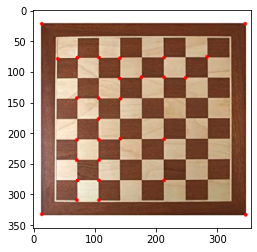

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_chess,150,0.5,10) #use 0 instead of 5 to detect all edges
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(chess,(x,y),3,255,-1)
plt.imshow(chess)

## Edge Detection

In [ ]:
!wget https://www.loveyourdog.com/wp-content/uploads/2020/08/Beagle-Indoors.jpg -q -O dog_new.jpg

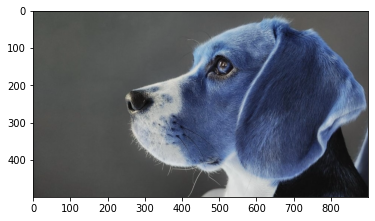

In [ ]:
img = cv2.imread('dog_new.jpg')
plt.imshow(img)

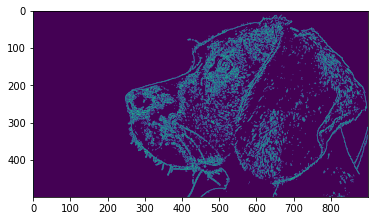

In [ ]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.imshow(edges)

general trend to chooose threshold  
https://stackoverflow.com/questions/25125670/best-value-for-threshold-in-canny

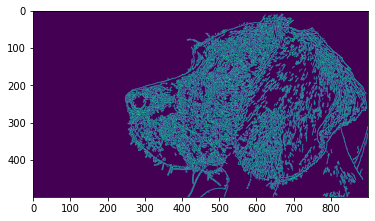

In [ ]:
# Calculate the median pixel value
med_val = np.median(img)

# Lower bound is either 0 or 70% of the median value, whicever is higher
lower = int(max(0, 0.7* med_val))

# Upper bound is either 255 or 30% above the median value, whichever is lower
upper = int(min(255,1.3 * med_val))

edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)

plt.imshow(edges)

Blurring can help to get rid of noise edges

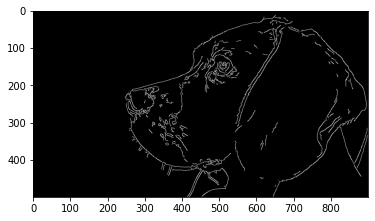

In [ ]:
blurred_img = cv2.blur(img,ksize=(5,5))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
plt.imshow(edges,cmap="gray")

## Grid Detection

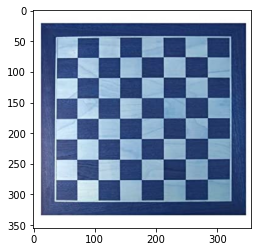

In [ ]:
flat_chess = cv2.imread('chess.jpg')
plt.imshow(flat_chess,cmap='gray')

In [ ]:
found, corners = cv2.findChessboardCorners(flat_chess,(7,7))
if found:
    print('OpenCV was able to find the corners')
else:
    print("OpenCV did not find corners. Double check your patternSize.")

OpenCV was able to find the corners


In [ ]:
corners.shape

(49, 1, 2)

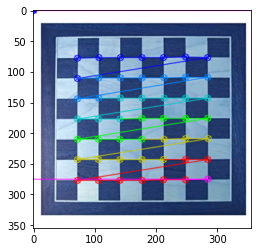

In [ ]:
flat_chess_copy = flat_chess.copy()
cv2.drawChessboardCorners(flat_chess_copy, (8, 8), corners, found)

plt.imshow(flat_chess_copy)

In [ ]:
!wget https://365psd.com/images/previews/e52/dots-square-grid-03-pattern-clip-art-49843.jpg -q -O dot_grid.jpg

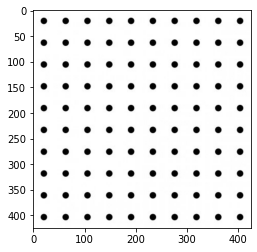

In [ ]:
dot_grid = cv2.imread("dot_grid.jpg")
plt.imshow(dot_grid)

In [ ]:
found, corners = cv2.findCirclesGrid(dot_grid, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)
found

True

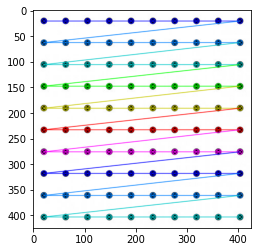

In [ ]:
dot_circles = dot_grid.copy()
cv2.drawChessboardCorners(dot_circles, (10, 10), corners, found)

plt.imshow(dot_circles)

## Contour detection

In [65]:
!wget http://clipart-library.com/img/2000821.jpg -q -O pic.jpg

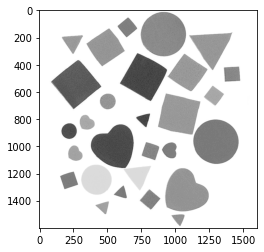

In [66]:
img = cv2.imread('pic.jpg',0)
plt.imshow(img,cmap="gray")

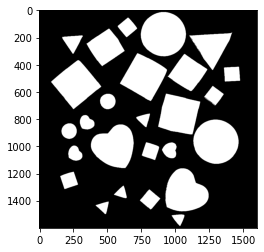

In [67]:
ret, thresh = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap="gray")

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [68]:
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [69]:
type(contours)

tuple

In [ ]:
type(hierarchy) , hierarchy[0]

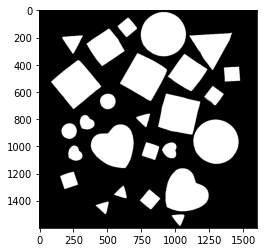

In [72]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
      cv2.drawContours(external_contours, contours, i, 255, -1)

plt.imshow(external_contours,cmap="gray")

In [ ]:
len(contours)

50

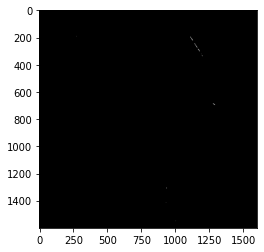

In [73]:
# Create empty array to hold internal contours
internal_contours = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
      cv2.drawContours(internal_contours, contours, i, 255, -1)
plt.imshow(internal_contours,cmap="gray")


In [74]:
!wget https://image.freepik.com/free-vector/donut_53876-25491.jpg -q -O doughnut.jpg

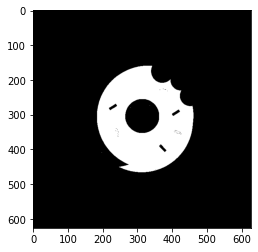

In [75]:
dn = cv2.imread('doughnut.jpg')
dn_gray = cv2.cvtColor(dn,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(dn_gray, 190, 205, cv2.THRESH_BINARY_INV)
plt.imshow(thresh,cmap="gray")

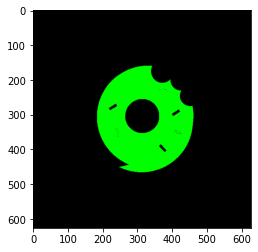

In [80]:
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

c_img = np.zeros(dn.shape)
cv2.drawContours(c_img, contours, -1, (0,255,0), -1)

plt.imshow(c_img)

In [ ]:
cv2.drawContours?

## Watershed Algo

Halka theory : https://docs.opencv.org/3.4/d3/db4/tutorial_py_watershed.html

In [81]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [82]:
!wget https://docs.opencv.org/3.4/water_coins.jpg -q -O coin.jpg


Let's try to simply use a threshold and then use findContours.

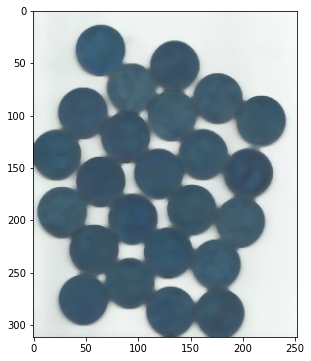

In [87]:
coins = cv2.imread('coin.jpg')
coins_blur = cv2.medianBlur(coins,7)
display(coins_blur)

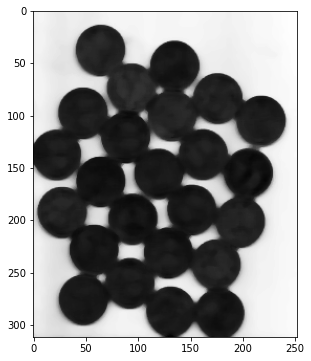

In [88]:
gray_coins = cv2.cvtColor(coins_blur,cv2.COLOR_BGR2GRAY)
display(gray_coins,cmap='gray')

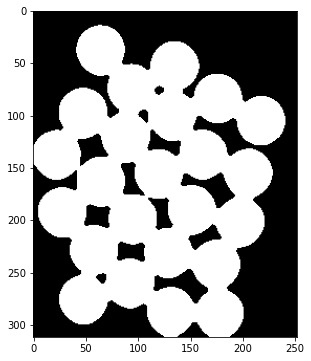

In [89]:
ret, sep_thresh = cv2.threshold(gray_coins,110,255,cv2.THRESH_BINARY_INV)
display(sep_thresh,cmap='gray')

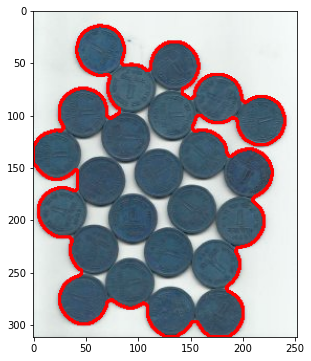

In [90]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: #only draw external contours
      cv2.drawContours(coins, contours, i, (255, 0, 0), 2)
display(coins)

**Watershed**

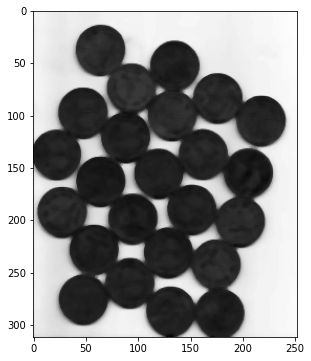

In [137]:
#read image, use blur and convert to grayscale
img = cv2.imread('coin.jpg')
img = cv2.medianBlur(img,5)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray,cmap="gray")

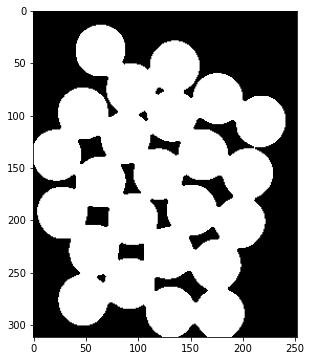

In [128]:
# Apply Threshold (Inverse Binary with OTSU as well)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh,cmap='gray')

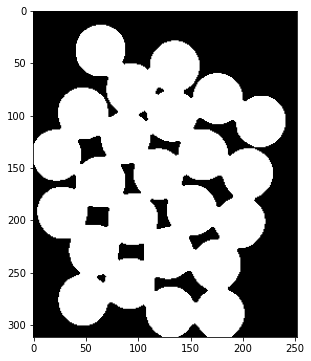

In [129]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

display(opening,cmap='gray')

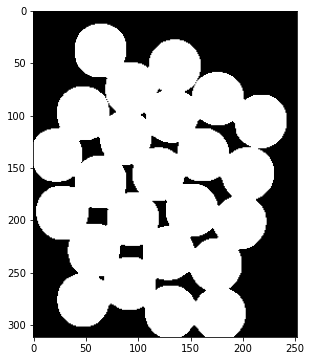

In [130]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
display(sure_bg,cmap='gray')

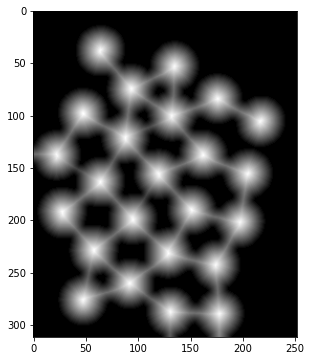

In [131]:
# Finding sure foreground area(brighter zones)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

display(dist_transform,cmap='gray')

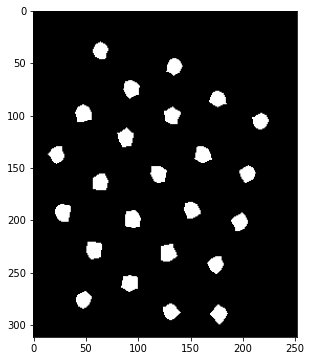

In [132]:
#centers/markers
display(sure_fg,cmap='gray')

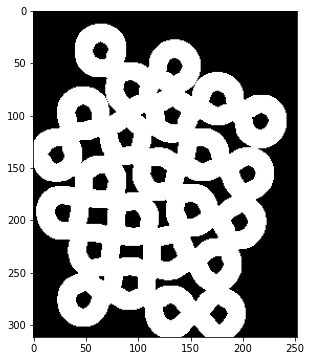

In [133]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

display(unknown,cmap='gray')

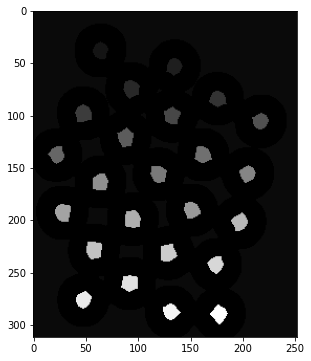

In [134]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

display(markers,cmap='gray')

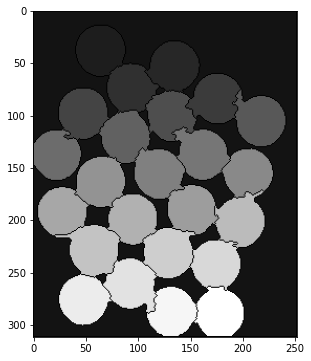

In [135]:
# apply watershed
markers = cv2.watershed(img,markers)
display(markers,cmap="gray")

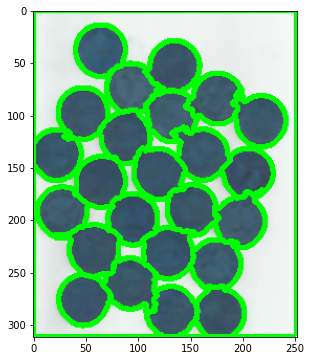

In [140]:
# draw contours using segmented image
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (0, 255, 0), 2)
display(img)